In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diamonds_train = pd.read_csv('inputs/train.csv')
diamonds_predict=pd.read_csv('inputs/predict.csv')
submit=pd.read_csv('inputs/sample_submission.csv')

In [3]:
submit

,id,price
0,0,9036
1,1,3171
2,2,14486
3,3,13267
4,4,13922
...,...,...
13480,13480,12275
13481,13481,463
13482,13482,5025
13483,13483,5266


In [4]:
diamonds_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


In [5]:
diamonds_predict.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.36,Ideal,I,SI2,60.8,54.0,8.68,8.57,5.24
1,1,2.04,Ideal,H,SI2,62.0,56.0,8.18,8.23,5.09
2,2,0.51,Ideal,I,SI1,61.7,54.0,5.18,5.19,3.20
3,3,0.30,Ideal,I,SI1,61.3,56.0,4.32,4.33,2.65
4,4,0.96,Fair,H,VS2,68.8,56.0,6.11,5.98,4.16


In [6]:
diamonds_train.shape

(40455, 11)

In [7]:
diamonds_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
diamonds_train.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.797150,61.746612,57.453561,5.729391,5.733217,3.537644,3928.715264
std,11678.496907,0.472872,1.431006,2.235668,1.121283,1.151076,0.709557,3985.070609
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,946.500000
50%,20227.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2398.000000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5328.500000
max,40454.000000,4.500000,79.000000,95.000000,10.230000,58.900000,31.800000,18818.000000


In [9]:
diamonds_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

# To numeric columns

### CUT Columns

In [10]:
diamonds_train['cut'].value_counts()

Ideal        16175
Premium      10272
Very Good     9146
Good          3676
Fair          1186
Name: cut, dtype: int64

In [11]:
d = {'Fair':1,'Good':2,'Very Good':3, 'Premium':4, 'Ideal':5}

diamonds_train['cut_numeric'] = diamonds_train['cut'].map(d)

In [12]:
diamonds_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_numeric
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605,3
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565,5
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720,3
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793,4
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381,3


In [13]:
diamonds_train.groupby('cut_numeric').agg({'price': 'mean'})

,price
cut_numeric,
1,4385.809444
2,3920.558215
3,3995.251585
4,4569.985105
5,3452.190170


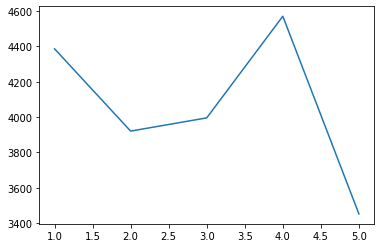

In [14]:
plt.plot(diamonds_train.groupby('cut_numeric').agg({'price': 'mean'}))

### COLOR Columns

In [15]:
diamonds_train['color'].value_counts()

G    8469
E    7375
F    7179
H    6229
D    5012
I    4088
J    2103
Name: color, dtype: int64

In [16]:
d_col = {'J':1,'I':2,'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

In [17]:
diamonds_train['color_numeric'] = diamonds_train['color'].map(d_col)

In [18]:
diamonds_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_numeric,color_numeric
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605,3,5
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565,5,6
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720,3,7
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793,4,3
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381,3,7


In [19]:
diamonds_train.groupby('color_numeric').agg({'price': 'mean'})

,price
color_numeric,
1,5261.771279
2,5088.839775
3,4497.562048
4,3992.564057
5,3710.167990
6,3076.877831
7,3174.757582


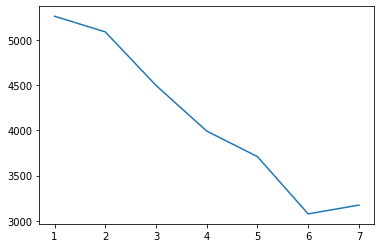

In [20]:
plt.plot(diamonds_train.groupby('color_numeric').agg({'price': 'mean'}))

### CLARITY Columns

In [21]:
diamonds_train['clarity'].value_counts()

SI1     9813
VS2     9217
SI2     6844
VS1     6150
VVS2    3784
VVS1    2780
IF      1326
I1       541
Name: clarity, dtype: int64

In [22]:
d_clar = {'I1':1,'SI2':2,'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [23]:
diamonds_train['clarity_numeric'] = diamonds_train['clarity'].map(d_clar)

In [24]:
diamonds_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_numeric,color_numeric,clarity_numeric
0,0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605,3,5,4
1,1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565,5,6,3
2,2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720,3,7,3
3,3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793,4,3,5
4,4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381,3,7,3


In [25]:
diamonds_train.groupby('clarity_numeric').agg({'price': 'mean'})

,price
clarity_numeric,
1,3765.463956
2,5030.889392
3,4030.433507
4,3946.352175
5,3793.370244
6,3269.630814
7,2534.015468
8,2863.806938


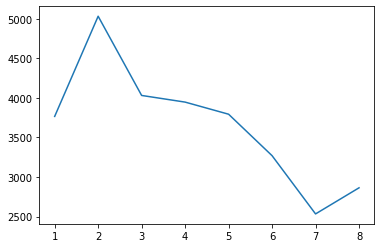

In [26]:
plt.plot(diamonds_train.groupby('clarity_numeric').agg({'price': 'mean'}))

In [27]:
X_diamonds_clean = diamonds_train[['carat', 'cut_numeric','color_numeric','clarity_numeric','depth','table','x','y','z']]
y_diamonds_clean = diamonds_train[['price']]

In [28]:
X_diamonds_clean.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,0.30,3,5,4,62.8,56.0,4.29,4.31,2.70
1,0.34,5,6,3,62.6,55.0,4.46,4.49,2.80
2,0.40,3,7,3,60.3,62.0,4.70,4.75,2.85
3,0.40,4,3,5,61.8,59.2,4.72,4.74,2.92
4,0.90,3,7,3,61.0,63.0,6.10,6.13,3.73


In [29]:
X_diamonds_clean.dtypes

carat              float64
cut_numeric          int64
color_numeric        int64
clarity_numeric      int64
depth              float64
table              float64
x                  float64
y                  float64
z                  float64
dtype: object

In [30]:
y_diamonds_clean.head()

,price
0,605
1,565
2,720
3,793
4,4381


In [31]:
X_diamonds_clean.to_csv('outputs/df_train_Xnonormalize.csv', index=False)

In [32]:
y_diamonds_clean.to_csv('outputs/df_train_ynonormalize.csv', index=False)

# Standardizar los datos

In [33]:
from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
print(scaler.fit(X_diamonds_clean))
X_diamonds_clean_scale = scaler.transform(X_diamonds_clean)
X_diamonds_clean_scale = pd.DataFrame(X_diamonds_clean_scale,columns=X_diamonds_clean.columns)
X_diamonds_clean_scale

StandardScaler(copy=True, with_mean=True, with_std=True)


,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,-1.051355,-0.810564,0.352161,-0.033632,0.736126,-0.650176,-1.283716,-1.236438,-1.180531
1,-0.966764,0.982588,0.940769,-0.641579,0.596363,-1.097476,-1.132102,-1.080061,-1.039596
2,-0.839879,-0.810564,1.529377,-0.641579,-1.010919,2.033618,-0.918059,-0.854183,-0.969129
3,-0.839879,0.086012,-0.825055,0.574315,0.037308,0.781181,-0.900222,-0.862870,-0.870475
4,0.217504,-0.810564,1.529377,-0.641579,-0.521746,2.480917,0.330526,0.344710,0.271096
...,...,...,...,...,...,...,...,...,...
40450,-1.009060,0.982588,1.529377,0.574315,-0.172337,-0.650176,-1.176694,-1.132187,-1.152344
40451,-1.051355,0.982588,1.529377,-0.033632,-0.591628,-0.202877,-1.256960,-1.201688,-1.265092
40452,-0.691845,0.086012,-0.236447,-0.641579,0.666244,0.244422,-0.677260,-0.645680,-0.588605
40453,-0.839879,-1.707140,-0.236447,-0.033632,1.225299,-0.650176,-0.935896,-0.897621,-0.785914


# Split train and test

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_diamonds_clean_scale, y_diamonds_clean, test_size=0.01)

In [35]:
X_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
39804,2.141939,-1.707140,-0.236447,-1.249527,-1.989264,-1.097476,2.016116,2.004047,1.666350
3793,1.105705,-0.810564,-0.825055,-1.249527,0.875890,0.691721,1.052922,1.091846,1.187172
6258,-0.501516,0.982588,1.529377,-0.641579,0.386717,-0.650176,-0.418625,-0.350300,-0.334923
34427,0.450128,-0.810564,0.352161,-0.641579,0.456599,1.139020,0.553488,0.579276,0.623433
29324,-0.142006,-0.810564,-0.236447,-0.033632,0.246954,0.691721,-0.044049,-0.002795,0.003320


In [36]:
y_test.shape

(405, 1)

# datos predecir

In [37]:
diamonds_predict

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.36,Ideal,I,SI2,60.8,54.0,8.68,8.57,5.24
1,1,2.04,Ideal,H,SI2,62.0,56.0,8.18,8.23,5.09
2,2,0.51,Ideal,I,SI1,61.7,54.0,5.18,5.19,3.20
3,3,0.30,Ideal,I,SI1,61.3,56.0,4.32,4.33,2.65
4,4,0.96,Fair,H,VS2,68.8,56.0,6.11,5.98,4.16
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.53,Premium,E,VVS1,60.8,59.0,5.23,5.17,3.16
13481,13481,1.01,Very Good,F,SI1,62.8,60.0,6.32,6.38,3.99
13482,13482,0.92,Premium,F,I1,60.7,58.0,6.29,6.26,3.81
13483,13483,0.39,Ideal,F,VVS2,62.0,54.0,4.70,4.72,2.92


In [38]:
d = {'Fair':1,'Good':2,'Very Good':3, 'Premium':4, 'Ideal':5}

diamonds_predict['cut_numeric'] = diamonds_predict['cut'].map(d)

In [39]:
d_col = {'J':1,'I':2,'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

In [40]:
diamonds_predict['color_numeric'] = diamonds_predict['color'].map(d_col)

In [41]:
d_clar = {'I1':1,'SI2':2,'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [42]:
diamonds_predict['clarity_numeric'] = diamonds_predict['clarity'].map(d_clar)

In [43]:
X_diamonds_predict = diamonds_predict[['carat', 'cut_numeric','color_numeric','clarity_numeric','depth','table','x','y','z']]

In [44]:
X_diamonds_predict

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,2.36,5,2,2,60.8,54.0,8.68,8.57,5.24
1,2.04,5,3,2,62.0,56.0,8.18,8.23,5.09
2,0.51,5,2,3,61.7,54.0,5.18,5.19,3.20
3,0.30,5,2,3,61.3,56.0,4.32,4.33,2.65
4,0.96,1,3,4,68.8,56.0,6.11,5.98,4.16
...,...,...,...,...,...,...,...,...,...
13480,0.53,4,6,7,60.8,59.0,5.23,5.17,3.16
13481,1.01,3,5,3,62.8,60.0,6.32,6.38,3.99
13482,0.92,4,5,1,60.7,58.0,6.29,6.26,3.81
13483,0.39,5,5,6,62.0,54.0,4.70,4.72,2.92


In [45]:
X_diamonds_predict.to_csv('outputs/df_test_Xnonormalize.csv', index=False)

In [46]:
# Your code here:
scaler = StandardScaler()
print(scaler.fit(X_diamonds_predict))
X_diamonds_predict_scale = scaler.transform(X_diamonds_predict)
X_diamonds_predict_scale = pd.DataFrame(X_diamonds_predict_scale,columns=X_diamonds_predict.columns)
X_diamonds_predict_scale

StandardScaler(copy=True, with_mean=True, with_std=True)


,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,3.267015,0.978152,-1.416151,-1.232414,-0.666318,-1.554540,2.620734,2.539800,2.446736
1,2.596725,0.978152,-0.830504,-1.232414,0.168508,-0.658049,2.175567,2.234832,2.230593
2,-0.608098,0.978152,-1.416151,-0.627731,-0.040199,-1.554540,-0.495431,-0.491942,-0.492811
3,-1.047976,0.978152,-1.416151,-0.627731,-0.318474,-0.658049,-1.261117,-1.263332,-1.285335
4,0.334497,-2.592365,-0.830504,-0.023048,4.899190,-0.658049,0.332578,0.216660,0.890505
...,...,...,...,...,...,...,...,...,...
13480,-0.566205,0.085523,0.926440,1.791000,-0.666318,0.686689,-0.450914,-0.509881,-0.550449
13481,0.439230,-0.807107,0.340792,-0.627731,0.725059,1.134934,0.519548,0.575446,0.645543
13482,0.250711,0.085523,0.340792,-1.837097,-0.735887,0.238443,0.492838,0.467811,0.386171
13483,-0.859457,0.978152,0.340792,1.186317,0.168508,-1.554540,-0.922791,-0.913515,-0.896278


In [47]:
X_diamonds_predict_scale.to_csv('outputs/df_test.csv', index=False)

In [48]:
X_diamonds_clean_scale.to_csv('outputs/df_train.csv', index=False)

In [49]:
y_diamonds_clean.to_csv('outputs/df_train_price.csv', index=False)